In [181]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Import file
df = pd.read_csv('all_df.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#df.info()

df = df.drop(df.index[358]).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 86 columns):
Unnamed: 0                            392 non-null int64
Date                                  392 non-null datetime64[ns]
Revenue                               392 non-null float64
Users                                 392 non-null float64
Sessions                              392 non-null float64
Transactions                          392 non-null float64
Quantity                              392 non-null float64
Bounces                               392 non-null float64
Pages / Session                       392 non-null float64
Avg. Session Duration                 392 non-null object
Session Duration                      392 non-null object
Avg. Session Duration Seconds         392 non-null float64
Avg. Session Duration Seconds.1       392 non-null float64
('Users', '(Other)')                  392 non-null float64
('Users', 'Affiliate')                392 non-null float64
('Users

In [141]:
#Calculate the emperical means and standard deviations for Revenue, Revenue Plan, Difference, Sessions

rev_mean = np.mean(df['Revenue'])
rev_std = np.std(df['Revenue'])
rev_plan_mean = np.mean(df['Daily Revenue Demand Plan'])
rev_plan_std = np.std(df['Daily Revenue Demand Plan'])
df['Rev Compared to Plan'] = df['Revenue'] - df['Daily Revenue Demand Plan']
rev_to_plan_mean = np.mean(df['Rev Compared to Plan'])
rev_to_plan_std = np.std(df['Rev Compared to Plan'])
users_mean = np.mean(df['Users'])
users_std = np.std(df['Users'])

print('Mean Daily Revenue:', rev_mean, 'Standard Deviation Daily Revenue:', rev_std)
print('Mean Daily Revenue Plan:', rev_plan_mean, 'Standard Deviation Daily Revenue Plan:', rev_plan_std)
print('Mean Revenue Compared to Plan:', rev_to_plan_mean, 'Standard Deviation Revenue Compared to Plan:', rev_to_plan_std)
print('Mean Users:', users_mean, 'Standard Deviation Users:', users_std)

('Mean Daily Revenue:', 454690.2997193876, 'Standard Deviation Daily Revenue:', 343490.393960676)
('Mean Daily Revenue Plan:', 510247.98979591834, 'Standard Deviation Daily Revenue Plan:', 374197.7137729505)
('Mean Revenue Compared to Plan:', -55557.69007653064, 'Standard Deviation Revenue Compared to Plan:', 228005.9916940056)
('Mean Users:', 189498.56632653062, 'Standard Deviation Users:', 72050.86689500781)


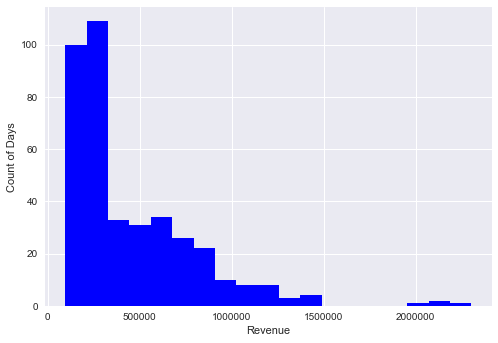

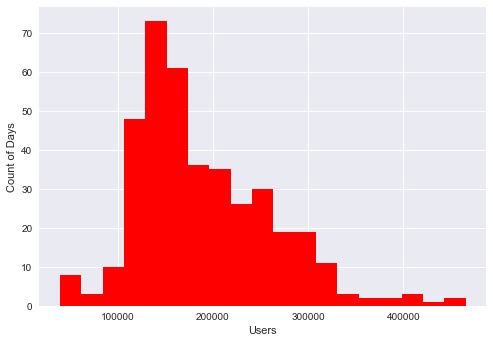

In [152]:
#Create histograms for Sessions & Revenue

#Calculate the bin number
n_data = len(df['Revenue'])
n_bins = int(np.sqrt(n_data))

#Create a histogram to visualize Revenue

_ = plt.hist(df['Revenue'], bins=n_bins, color='b')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count of Days')

plt.show()

#Create a histogram to visualize Users

_ = plt.hist(df['Users'], bins= n_bins, color='r')
_ = plt.xlabel('Users')
_ = plt.ylabel('Count of Days')

plt.show()

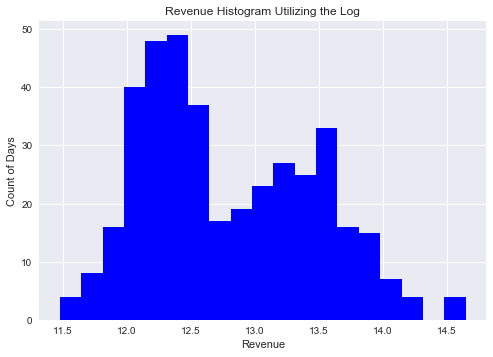

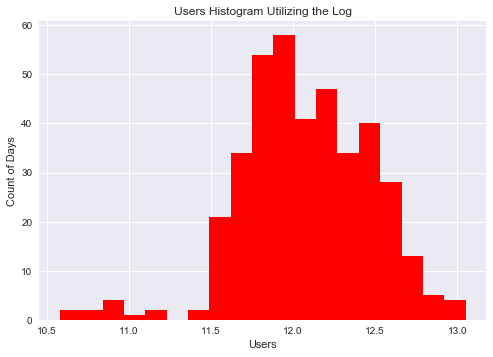

In [99]:
#Create a histogram to visualize Revenue using the log
_ = plt.hist(np.log(df['Revenue']), bins=n_bins, color='b')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count of Days')
_ = plt.title('Revenue Histogram Utilizing the Log')
plt.show()

#Create a histogram to visualize Users using the log
_ = plt.hist(np.log(df['Users']), bins= n_bins, color='r')
_ = plt.xlabel('Users')
_ = plt.ylabel('Count of Days')
_ = plt.title('Users Histogram Utilizing the Log')

plt.show()

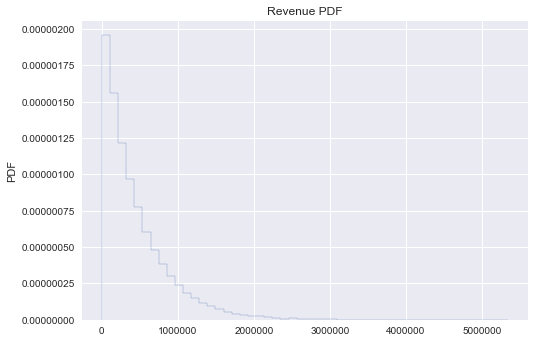

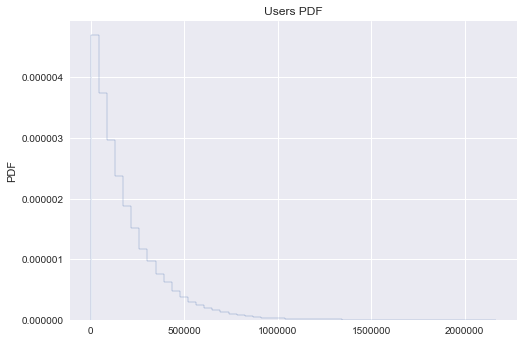

In [139]:
np.random.seed(42)

tau = np.mean(df['Revenue'])
#Draw out of an exponential distribution with parameter tau: Revenue

inter_revenue = np.random.exponential(tau, 100000)

_ = plt.hist(inter_revenue, bins = 50, normed=True, histtype = 'step')
_ = plt.ylabel('PDF')
_ = plt.title('Revenue PDF')
plt.show()

tau2 = np.mean(df['Users'])
#Draw out of an exponential distribution with parameter tau: Revenue

inter_users = np.random.exponential(tau2, 100000)

_ = plt.hist(inter_users, bins = 50, normed=True, histtype = 'step')
_ = plt.ylabel('PDF')
_ = plt.title('Users PDF')
plt.show()

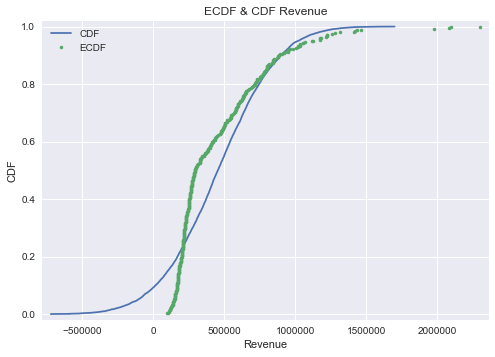

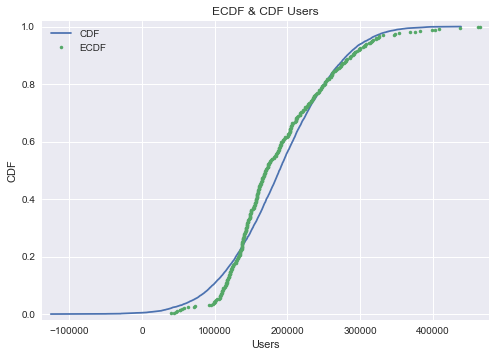

In [142]:
#Compute the ECDF for Revenue Data:

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1.0, n+1.0) / n
    return x, y

#Create the samples
samples = np.random.normal(rev_mean, rev_std, size=10000)
users_samples = np.random.normal(users_mean, users_std, size=10000)

#Calculate the ECDF of the data and the samples
x_rev, y_rev = ecdf(df['Revenue'])
x_theor, y_theor = ecdf(samples)

#Graph the ECDF of the data and the samples
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_rev, y_rev, marker ='.', linestyle= 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('CDF')
_ = plt.title('ECDF & CDF Revenue')
_ = plt.legend(('CDF', 'ECDF'), loc='upper left')
plt.show()

#Calculate the ECDF of the data and the samples
x_users, y_users = ecdf(df['Users'])
x_utheor, y_utheor = ecdf(users_samples)

#Graph the ECDF of the data and the samples
_ = plt.plot(x_utheor, y_utheor)
_ = plt.plot(x_users, y_users, marker ='.', linestyle= 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('Users')
_ = plt.ylabel('CDF')
_ = plt.title('ECDF & CDF Users')
_ = plt.legend(('CDF', 'ECDF'), loc='upper left')
plt.show()

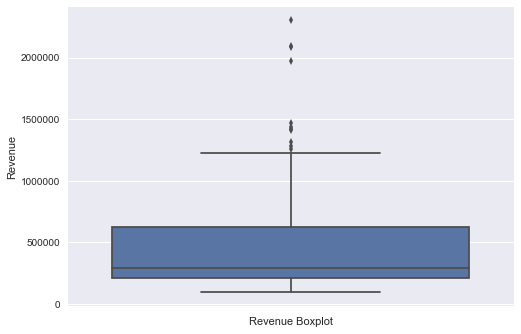

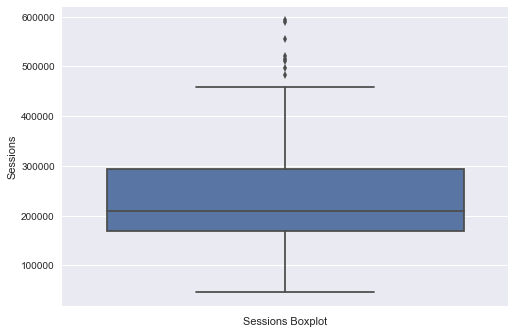

In [153]:
_ = sns.boxplot(y='Revenue', data=df)
_ = plt.xlabel('Revenue Boxplot')
plt.show()

_ = sns.boxplot(y='Sessions', data=df)
_ = plt.xlabel('Sessions Boxplot')
plt.show()

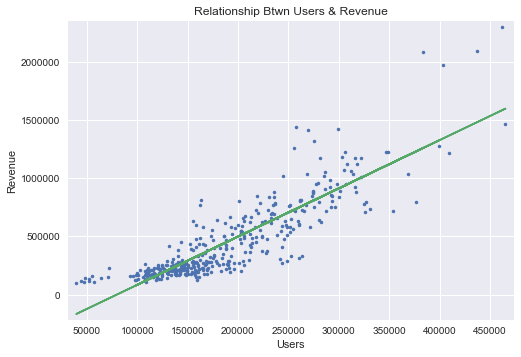

In [154]:
#Create a scatterplot to look at the correlation between Sessions and Revenue

m, b = np.polyfit(df['Users'], df['Revenue'], 1)

_ = plt.plot(df['Users'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Users'], m*df['Users'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Users')
_ = plt.ylabel('Revenue')
_ = plt.title('Relationship Btwn Users & Revenue')

plt.show()

In [159]:
#Compute the covariance of Revenue and Users

covariance_matrix = np.cov(df['Revenue'], df['Users'])
print 'Covariance Matrix: ', covariance_matrix

cov = covariance_matrix[0,1]
print 'Covariance: ', cov

#Compute pearson correlation coefficient
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

r = pearson_r(df['Revenue'], df['Users'])

print 'Pearson R for Revenue and Users:', r

#Calculate the Slope and Intercept

slope, intercept = np.polyfit(df['Revenue'], df['Users'], 1)

print 'Slope:', slope
print 'Intercept:', intercept

Covariance Matrix:  [[  1.18287404e+11   2.15626260e+10]
 [  2.15626260e+10   5.20460447e+09]]
Covariance:  21562625976.1
Pearson R for Revenue and Users: 0.869037532679
Slope: 0.182290127161
Intercept: 106613.013772


SEM Revenue: 17348.8847744
STD Bootstrap Replicates Revenue: 17266.4466586


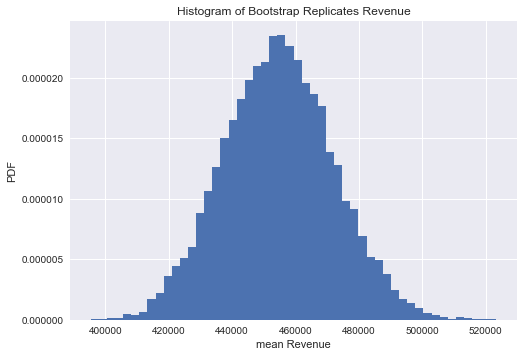

SEM Users: 3639.11832656
STD Bootstrap Replicates Users: 3611.80081537


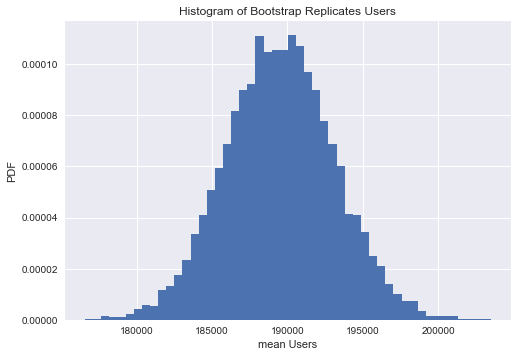

Confidence Intervals Revenue:  [ 421198.98697449  488764.66693048]
Confidence Intervals Users:  [ 225228.75121173  243615.12971939]


In [186]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df['Revenue'], np.mean, 10000)

# Compute and print SEM
sem = np.std(df['Revenue'])/ np.sqrt(len(df['Revenue']))
print 'SEM Revenue:', (sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print 'STD Bootstrap Replicates Revenue:', (bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean Revenue')
_ = plt.ylabel('PDF')
_ = plt.title('Histogram of Bootstrap Replicates Revenue')

# Show the plot
plt.show()

conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates_users = draw_bs_reps(df['Users'], np.mean, 10000)

# Compute and print SEM
sem_users = np.std(df['Users'])/ np.sqrt(len(df['Users']))
print 'SEM Users:', (sem_users)

# Compute and print standard deviation of bootstrap replicates
bs_std_users = np.std(bs_replicates_users)
print 'STD Bootstrap Replicates Users:', (bs_std_users)

# Make a histogram of the results
_ = plt.hist(bs_replicates_users, bins=50, normed=True)
_ = plt.xlabel('mean Users') 
_ = plt.ylabel('PDF')
_ = plt.title('Histogram of Bootstrap Replicates Users')

# Show the plot
plt.show()

conf_int_users = np.percentile(bs_replicates_sessions, [2.5, 97.5])

print 'Confidence Intervals Revenue: ', conf_int
print 'Confidence Intervals Users: ', conf_int_users


95% Confidence Intervals: [ 3.75342215  4.51643781]


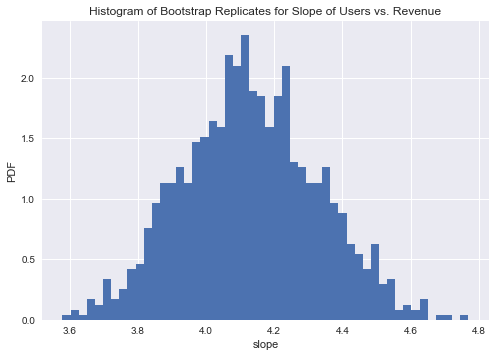

In [187]:
#Pairs Bootstrap

def draw_bs_pairs_linreg(x, y, size=1):

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


# Generate replicates of slope and intercept using pairs bootstrap
x_users = df['Users']
y_revenue = df['Revenue']
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x_users, y_revenue, 1000)

# Compute and print 95% CI for slope
print '95% Confidence Intervals:',(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
_ = plt.title('Histogram of Bootstrap Replicates for Slope of Users vs. Revenue')
plt.show()


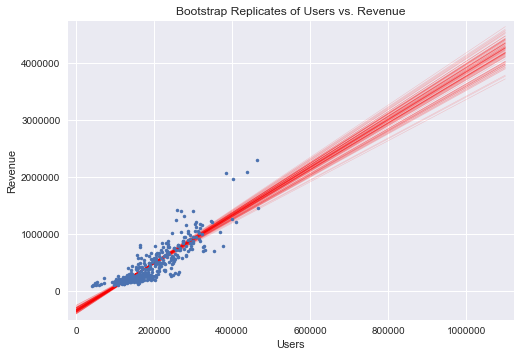

In [188]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,1100000])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(df['Users'], df['Revenue'], marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Users')
_ = plt.ylabel('Revenue')
_ = plt.title('Bootstrap Replicates of Users vs. Revenue')
plt.margins(0.02)
plt.show()

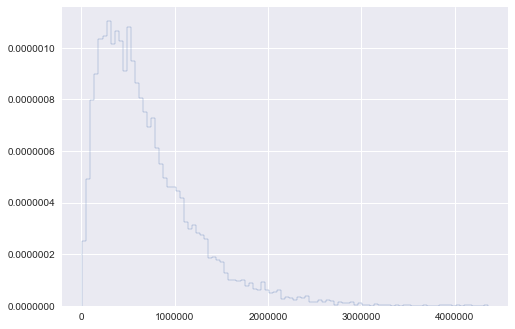

In [167]:
def successive_poisson(tau1, tau2, size=1):
    t1 = np.random.exponential(tau1, size)
    t2 = np.random.exponential(tau2, size)
    return t1 + t2

sample_successive_poisson = successive_poisson(rev_mean, sessions_mean, 10000)

_ = plt.hist(sample_successive_poisson, bins=100, normed = True, histtype='step')
plt.show()

There does appear to be a strong correlation between website traffic (sessions) and revenue. The Pearson R for the dataset for Revenue and Sessions is 0.89. 

There is a single outlier in the data (Cyber Monday) that makes an initial histogram appear to not be a normal curve, however, the histogram built off of the bootstrap data does appear to have a more normal curve.

For the project, it will be important to take into account website traffic. Additional analysis will need to be done to determine if the source of the traffic has any impact on the revenue, i.e. does traffic from Paid Search have a larger impact of revenue than Direct traffic.

**Exploring the relationship between other features and revenue.**

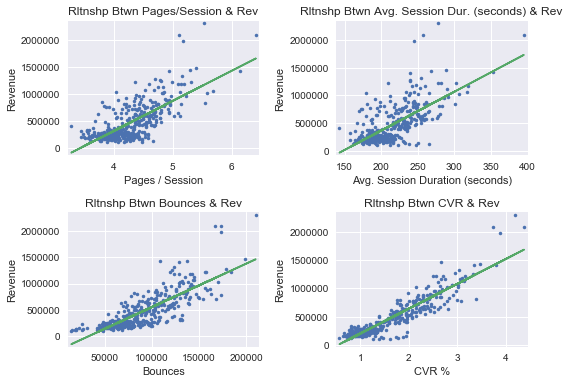

In [197]:
#Create a scatterplot to look at the correlation between pages/session and revenue
m, b = np.polyfit(df['Pages / Session'], df['Revenue'], 1)

_ = plt.subplot(2, 2, 1)
_ = plt.plot(df['Pages / Session'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Pages / Session'], m*df['Pages / Session'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Pages / Session')
_ = plt.ylabel('Revenue')
_ = plt.title('Rltnshp Btwn Pages/Session & Rev')

#Create a scatterplot to look at the correlation between Avg. Session Duration (in seconds) and Revenue

m1, b1 = np.polyfit(df['Avg. Session Duration Seconds'], df['Revenue'], 1)

_ = plt.subplot(2, 2, 2)
_ = plt.plot(df['Avg. Session Duration Seconds'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Avg. Session Duration Seconds'], m1 * df['Avg. Session Duration Seconds'] + b1, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Avg. Session Duration (seconds)')
_ = plt.ylabel('Revenue')
_ = plt.title('Rltnshp Btwn Avg. Session Dur. (seconds) & Rev')


#Create a scatterplot to look at the correlation between Bounces and revenue


m2, b2 = np.polyfit(df['Bounces'], df['Revenue'], 1)

_ = plt.subplot(2, 2, 3)
_ = plt.plot(df['Bounces'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Bounces'], m2 * df['Bounces'] + b2, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Bounces')
_ = plt.ylabel('Revenue')
_ = plt.title('Rltnshp Btwn Bounces & Rev')


#Create a scatterplot to look at the correlation between Conversion Rate and Revenue

cvr = df['Transactions']/df['Users'] * 100

m3, b3 = np.polyfit(cvr, df['Revenue'], 1)

_ = plt.subplot(2, 2, 4)
_ = plt.plot(cvr, df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(cvr, m3 * cvr + b3, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('CVR %')
_ = plt.ylabel('Revenue')
_ = plt.title('Rltnshp Btwn CVR & Rev')

plt.tight_layout()
plt.show()

In [198]:
#Compute pearson correlation coefficient

r = pearson_r(df['Revenue'], df['Pages / Session'])

print 'Pearson R for Revenue and Pages / Session:', r

r1 = pearson_r(df['Revenue'], df['Bounces'])

print 'Pearson R for Revenue and Bounces:', r1

r2 = pearson_r(df['Revenue'], cvr)

print 'Pearson R for Revenue and Conversion Rate:', r2

r3 = pearson_r(df['Revenue'], df['Avg. Session Duration Seconds'])

print 'Pearson R for Revenue and Avg. Session Duration (seconds):', r3

Pearson R for Revenue and Pages / Session: 0.718284446971
Pearson R for Revenue and Bounces: 0.807895858329
Pearson R for Revenue and Conversion Rate: 0.917005637173
Pearson R for Revenue and Avg. Session Duration (seconds): 0.673856199146


In [189]:
#Separate the data for email days and non email days

email_days = df[df['Email Day'] == 1]
non_email_days = df[df['Email Day'] == 0]

#Separate the data for SS days and non SS days

ss_days = df[df['SS'] == 1]
non_ss_days = df[df['SS'] == 0]

#Separate the data for SOS days and non SOS days

sos_days = df[df['SOS'] == 1]
non_sos_days = df[df['SOS'] == 0]

In [211]:
#Calculate the mean and standard deviations for Revenue for the two new email datasets.
email_mean = np.mean(email_days['Revenue'])
email_std = np.std(email_days['Revenue'])
non_email_mean = np.mean(non_email_days['Revenue'])
non_email_std = np.std(non_email_days['Revenue'])
print 'Email Data: \n'
print 'Mean Revenue Email Days:', email_mean
print 'Standard Deviation Email Days:', email_std
print 'Mean Revenue Non Email Days:', non_email_mean
print 'Standard Deviation Non Email Days:', non_email_std

#Import library necessary for t-test and z-score

from scipy import stats

#Calculate the t statistic and p-value for the two sample t-test.

two_sample = stats.ttest_ind(email_days['Revenue'], non_email_days['Revenue'])

print 'Email vs. Non Email Days TTest:', (two_sample[0])
print 'Email vs. Non Email Days PValue:', (two_sample[1])

#Calculate the mean and standard deviations for Revenue for the two new SS datasets.
ss_mean = np.mean(ss_days['Revenue'])
ss_std = np.std(ss_days['Revenue'])
non_ss_mean = np.mean(non_ss_days['Revenue'])
non_ss_std = np.std(non_ss_days['Revenue'])
print '\nSS Data: \n'
print 'Mean Revenue SS Days:', ss_mean
print 'Standard Deviation SS Days:', ss_std
print 'Mean Revenue Non SS Days:', non_ss_mean
print 'Standard Deviation Non SS Days:', non_ss_std

#Calculate the t statistic and p-value for the two sample t-test.

two_sample1 = stats.ttest_ind(ss_days['Revenue'], non_ss_days['Revenue'])

print 'SS vs. Non SS Days TTest:', (two_sample1[0])
print 'SS vs. Non SS Days PValue:', (two_sample1[1])

#Calculate the mean and standard deviations for Revenue for the two new SOS datasets.
sos_mean = np.mean(sos_days['Revenue'])
sos_std = np.std(sos_days['Revenue'])
non_sos_mean = np.mean(non_sos_days['Revenue'])
non_sos_std = np.std(non_sos_days['Revenue'])
print '\nSOS Data: \n'
print 'Mean Revenue SOS Days:', sos_mean
print 'Standard Deviation SOS Days:', sos_std
print 'Mean Revenue Non SOS Days:', non_sos_mean
print 'Standard Deviation Non SOS Days:', non_sos_std

#Calculate the t statistic and p-value for the two sample t-test.

two_sample2 = stats.ttest_ind(sos_days['Revenue'], non_sos_days['Revenue'])

print 'SOS vs. Non SOS Days TTest:', (two_sample2[0])
print 'SOS vs. Non SOS Days PValue:', (two_sample2[1])



Email Data: 

Mean Revenue Email Days: 464926.704864
Standard Deviation Email Days: 354854.024848
Mean Revenue Non Email Days: 435203.217333
Standard Deviation Non Email Days: 319842.385423
Email vs. Non Email Days TTest: 0.812703802116
Email vs. Non Email Days PValue: 0.416883719329

SS Data: 

Mean Revenue SS Days: 531314.112941
Standard Deviation SS Days: 471450.880591
Mean Revenue Non SS Days: 447413.177793
Standard Deviation Non SS Days: 327828.277409
SS vs. Non SS Days TTest: 1.36084319337
SS vs. Non SS Days PValue: 0.174349104564

SOS Data: 

Mean Revenue SOS Days: 636702.045566
Standard Deviation SOS Days: 298618.218965
Mean Revenue Non SOS Days: 387231.400909
Standard Deviation Non SOS Days: 334418.165509
SOS vs. Non SOS Days TTest: 6.7305269138
SOS vs. Non SOS Days PValue: 6.05645049171e-11


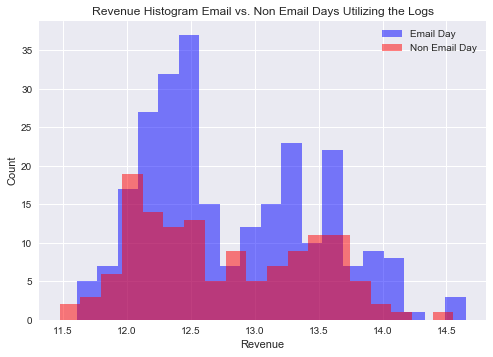

In [124]:
#Create a histogram showing both datasets.
sns.set()

_ = plt.hist(np.log(email_days['Revenue']), bins= n_bins, alpha=0.5, color='b', label = 'Email Day')
_ = plt.hist(np.log(non_email_days['Revenue']), bins= n_bins, alpha=0.5, color='r', label = 'Non Email Day')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.title('Revenue Histogram Email vs. Non Email Days Utilizing the Logs')
plt.legend()
plt.show()

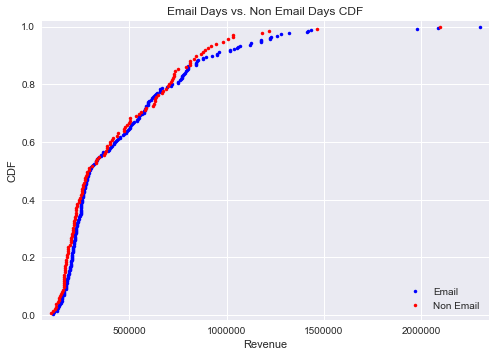

In [207]:
#Calculate the ECDF of the data for email and non email days
x_email, y_email = ecdf(email_days['Revenue'])
x_nonemail, y_nonemail = ecdf(non_email_days['Revenue'])

#Create an ECDF graph for the two datasets
_ = plt.plot(x_email, y_email, marker ='.', linestyle= 'none', color='b')
_ = plt.plot(x_nonemail, y_nonemail, marker ='.', linestyle= 'none', color='r')
_ = plt.margins(0.02)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('CDF')
_ = plt.legend(('Email', 'Non Email'), loc='lower right')
_ = plt.title('Email Days vs. Non Email Days CDF')
plt.show()

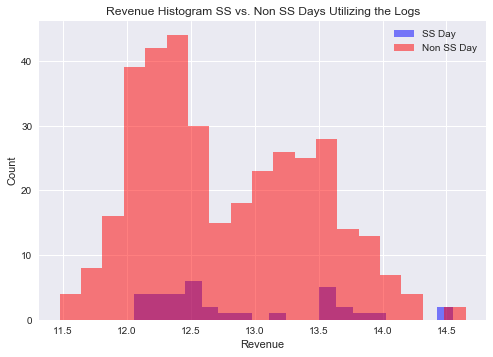

In [128]:
#Create a histogram showing both datasets.
sns.set()

_ = plt.hist(np.log(ss_days['Revenue']), bins= n_bins, alpha=0.5, color='b', label = 'SS Day')
_ = plt.hist(np.log(non_ss_days['Revenue']), bins= n_bins, alpha=0.5, color='r', label = 'Non SS Day')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.title('Revenue Histogram SS vs. Non SS Days Utilizing the Logs')
plt.legend()
plt.show()

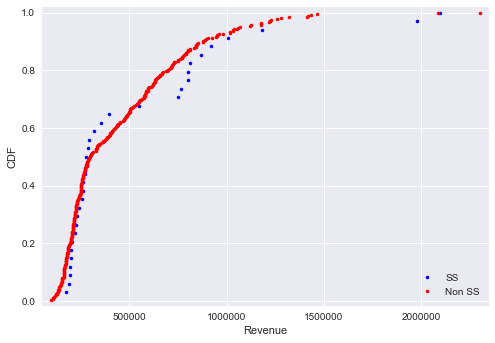

In [129]:
#Calculate the ECDF of the data for ss and non ss days
x_ss, y_ss = ecdf(ss_days['Revenue'])
x_nonss, y_nonss = ecdf(non_ss_days['Revenue'])

#Create an ECDF graph for the two datasets
_ = plt.plot(x_ss, y_ss, marker ='.', linestyle= 'none', color='b')
_ = plt.plot(x_nonss, y_nonss, marker ='.', linestyle= 'none', color='r')
_ = plt.margins(0.02)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('CDF')
_ = plt.legend(('SS', 'Non SS'), loc='lower right')
plt.show()

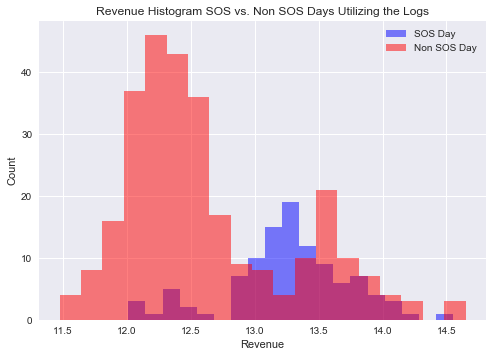

In [136]:
#Create a histogram showing both datasets.
sns.set()

_ = plt.hist(np.log(sos_days['Revenue']), bins= n_bins, alpha=0.5, color='b', label = 'SOS Day')
_ = plt.hist(np.log(non_sos_days['Revenue']), bins= n_bins, alpha=0.5, color='r', label = 'Non SOS Day')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.title('Revenue Histogram SOS vs. Non SOS Days Utilizing the Logs')
plt.legend()
plt.show()

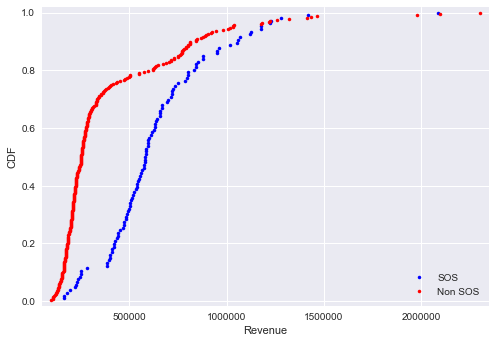

In [137]:
#Calculate the ECDF of the data for sos and non sos days
x_sos, y_sos = ecdf(sos_days['Revenue'])
x_nonsos, y_nonsos = ecdf(non_sos_days['Revenue'])

#Create an ECDF graph for the two datasets
_ = plt.plot(x_sos, y_sos, marker ='.', linestyle= 'none', color='b')
_ = plt.plot(x_nonsos, y_nonsos, marker ='.', linestyle= 'none', color='r')
_ = plt.margins(0.02)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('CDF')
_ = plt.legend(('SOS', 'Non SOS'), loc='lower right')
plt.show()